In [22]:
# we will need matplotlib for plotting
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


# Linear algebra: Review

### Equation of a 2D line

There are two equations of lines

1. $y = m x + c$
2. $a x + b y + c = 0$

What are the advantages or disadvantages of both of those?


A 2D line is the set of all points (x, y) that satisfy the an equation $a x + b y + c = 0$ for given $a, b, c$. For the same line there can be multiple valid parameters $a, b , c$. Either $a$ or $b$ can be zero. But both $a$ and $b$ cannot be zero at the same time. 

Ideally the equation of line must  be written in the set notation:

$\newcommand{\bbR}{\mathbb{R}}$
$\newcommand{\calL}{\mathcal{L}}$
$\newcommand{\calC}{\mathcal{C}}$
$$\calL(a, b, c) = \{(x, y): ax + by + c = 0, x \in \bbR, y \in \bbR \}$$

This equation is read as: the line $\mathcal{L}$ defined by the paramters $a,b,c$ is the set of all points $(x, y)$ such that it the $x,y$ satisfy the equation $ax + by + c = 0$ and $x$ and $y$ are in the set of all real numbers.

#### Implicit form

Line is a type of curve. Other curves can be parabola, circle etc. Every curve can be represented in implicit form like we did for the line above. In implicit form, the points are *constrained* by one or more equations to lie on the curve. The equations define a test whether the point lies on the curve or not.

$$\calC(p_1, p_2, \dots, p_n) = \{(x, y): f(x, y; p_1, p_2, \dots, p_n) = 0, x \in \bbR, y \in \bbR\}$$

This equation is read as the curve $\calC$ defined by the paramters $p_1, p_2, \dots, p_n$ is the set of all points $(x, y)$ such that it the $x,y$ satisfy the equation $f(x, y; p_1, p_2, \dots, p_n) = 0$ and $x$ and $y$ are in the set of all real numbers.

Take circle with center $(x_0, y_0)$ and radius $r$, as an example. The implicit form is:

$$\calC(x_0, y_0, r) = \{(x, y): (x-x_0)^2 + (y-y_0)^2 - r^2 = 0, x \in \bbR, y \in \bbR\}$$

#### Paramteric form of 2D Line

A parameteric form defines how the points on the curve are generated from a free paramters. For a line:

$$\calL(d_x, d_y, x_0, y_0) = \{(d_xr+x_0, d_yr+y_0): r \in \bbR \}$$

This equation is read as: the line $\calL$ defined by the paramters $d_x,d_y,x_0,y_0$ is the set of all points $(d_xr+x_0, d_yr+y_0)$ such that $r$ is any real number.

Take circle with center $(x_0, y_0)$ and radius $r$, as an example. The parameteric form is:

$$\calC(x_0, y_0, r) = \{(r\cos(\theta) + x_0, r\sin(\theta) + y_0): \theta \in [0, 2\pi)\}$$

In general, the paramteric form of a curve depend on some free paramters and the points are defined as functions of the free parameters.

In [12]:
def stylizeax(ax, limits):
    """Set ax style"""
    minx, maxx, miny, maxy = limits
     # x-axis, y=0
    ax.annotate("", 
                xy=(minx, 0),
                xytext=(maxx, 0),
                arrowprops=dict(arrowstyle="<->"),
                color='k')
    ax.text(maxx, 0, "x")
     # y-axis, x=0
    ax.annotate("", 
                xy=(0, miny),
                xytext=(0, maxy),
                arrowprops=dict(arrowstyle="<->"),
                color='k')
    ax.text(0, maxy, "y")
    

    ax.grid(True, which='both') # show the grid
    ax.set_aspect('equal') # set aspect ratio of the grid to 1:1
    
    
def points_on_line(a, b, c, Npts=6, scale=10):
    """Generate points on the line ax + by + c = 0"""
    # ax + by + c = 0
    # In parameteric form with free parameter r
    #   (x, y) = (-b*r + x0, a*r + y0)
    # where 
    #   x0 = - a*c / (a*a + b*b)
    #   y0 = - b*c / (a*a + b*b)
    # (x0, y0) is the point on the line closest to the origin
    uniformgrid = [i/Npts for i in range(-scale*Npts//2, scale*Npts//2, scale)]
    x0 = -a*c/(a*a + b*b)
    y0 = -b*c/(a*a + b*b)
    x = [-b*r + x0 for r in uniformgrid]
    y = [ a*r + y0 for r in uniformgrid]
    return x, y
    

# Matplotlib

Text(0.5, 1.0, '2.8x-3.7y+2.3 = 0')

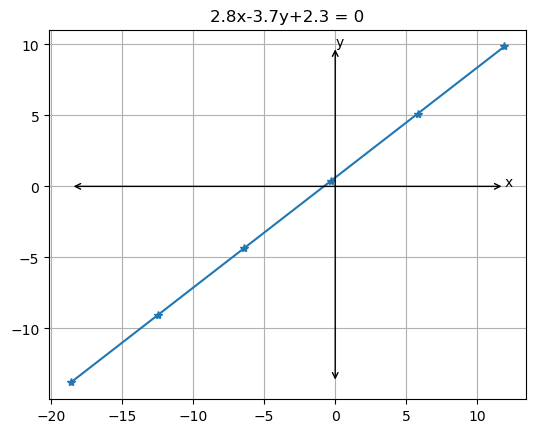

In [13]:
# Plot a line ax + by + c = 0
# a, b, c = 2.5, -1, -5 # pick numbers by hand

# pick a, b, c at random
import random
scale = 10
a, b, c = [scale*(random.random()-0.5) for _ in range(3)] # random number from -10 to 10

# Generate some sample points on a line
x, y = points_on_line(a, b, c, scale=scale)

# Plot the points
fig, ax = plt.subplots()
stylizeax(ax, (min(x), max(x), min(y), max(y)))
ax.plot(x, y, '*-') # the line
ax.set_title(f'{a:.1f}x{b:+.1f}y{c:+.1f} = 0') # print the equation

# Vectors

$\newcommand{\bfz}{\mathbf{z}}
\newcommand{\bfy}{\mathbf{y}}
\newcommand{\bfx}{\mathbf{x}}
\newcommand{\bfw}{\mathbf{w}}
\newcommand{\bfv}{\mathbf{v}}
\newcommand{\bfu}{\mathbf{u}}$
 We will denote vectors with bold font notations instead of the usualy $\vec{x}$ notation. The arrow notation vectors are sometimes called geometric vectors. We will make no such distinction. The set of all real numbers will be denoted as $\bbR$. The set of all real 2D vectors is written as $\bbR^2$. When we write $\bfx \in \bbR^2$, it means that $\bfx$ is in the set of real 2D vectors, hence a 2D real vector. We will write $\|\bfx\|$ for the magnitude of the vector, and $\bfx \cdot \bfy$ for dot product between two vector $\bfx$ and $\bfy$.

## n-D vector

A n-D vector is also written as $\bfx \in \bbR^n$ and the vector has $\bfx = [x_1; \dots; x_n]$ $n$ real components. Every vector has a magnitude $\|\bfx\|$ and a direction $\hat{\bfx}$. The magnitude and direction are given by:

$$ \|\bfx\| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^n} \in \bbR$$ 
$$ \hat{\bfx} = \frac{1}{\|\bfx\|} \bfx \in \bbR^n$$

The direction vector $\hat{\bfx}$ is a unit vector because its magnitide is one i.e. $\|\hat{\bfx}\| = 1$.

#### Vector addition

Vector addition is element-wise addition

$$ \bfv + \bfw 
= \begin{bmatrix} v_1 \\ \vdots \\ v_n \end{bmatrix} + \begin{bmatrix} w_1 \\ \vdots \\ w_n \end{bmatrix}
= \begin{bmatrix} v_1 + w_1 \\ \vdots \\ v_n + w_n \end{bmatrix} $$

Geometrically the resulting vector can be obtained by triangle law or the parallelogram law.

![](https://openstax.org/apps/archive/20221219.191545/resources/8c95eeee388ee88ecb81b6026404d02273fbcb84)

Reference: \[[1](https://openstax.org/books/calculus-volume-3/pages/2-1-vectors-in-the-plane)\]

### Dot product of vectors

Dot product of two vectors is a scalar given by sum of element-wise product.

$$ \bfv \cdot \bfu 
= \begin{bmatrix} v_1 \\ \vdots \\ v_n \end{bmatrix} \cdot \begin{bmatrix} u_1 \\ \vdots \\ u_n \end{bmatrix}
= v_1 u_1 + v_2 u_2 + \cdots + v_n u_n $$

Geometrically, dot product is closely related to the projection. Projection of vector $\bfv$ on $\bfu$ is the dot product of $\bfv$ with the direction of $\bfu$ 

$$\text{proj}_{\bfu}\bfv = \bfv \cdot \hat{\bfu}$$

![](https://openstax.org/apps/archive/20221219.191545/resources/263b8d95f699470f4cf6d49170b85118906c5ede)

Dot product of vector with itself gives the square of the magnitude $\bfv \cdot \bfv = \|\bfv\|^2$.

Reference: \[[2](https://openstax.org/books/calculus-volume-3/pages/2-3-the-dot-product)\]

### Matrices 

$\newcommand{\bfX}{\mathbf{X}}$
$\newcommand{\bfV}{\mathbf{V}}$
$\newcommand{\bfU}{\mathbf{U}}$
Matrices are a group of vectors. A matrix can be obtained by vertical stacking of row (horizontal) vectors or horizontal stacking of column (vertical) vectors. It is common to represent all vectors as column vectors unless specified otherwise, so we consider a matrix $\bfV$ as a horizontal concatenation of column vectors $\bfv_1, \bfv_2, \dots, \bfv_n$. Let each vector be m-dimensional $\bfv_i \in \bbR^m$.

$$\bfV = \begin{bmatrix}\bfv_1 & \bfv_2 & \dots & \bfv_n\end{bmatrix} 
= \begin{bmatrix}
\bfv_1[1]& \bfv_2[1] & \dots & \bfv_n[1]\\
\bfv_1[2]& \bfv_2[2] & \dots & \bfv_n[2]\\
\vdots & \vdots & \ddots & \vdots\\
\bfv_1[m] & \bfv_2[m] & \dots & \bfv_n[m]
\end{bmatrix}$$

Such a matrix is said to be a $m \times n$ matrix. It is also written as $\bfV \in \bbR^{m \times n}$.

### Transpose of a Matrix

Transpose of a matrix $\bfV$ (denoted as $\bfV^\top$) is an operation that swaps rows with columns and columns with rows. For example, the transpose of the above matrix will make it a vertical concatenation of row vectors.

$$\bfV^\top = \begin{bmatrix}\bfv_1^\top \\ \bfv_2^\top \\ \vdots \\ \bfv_n^\top\end{bmatrix} 
= \begin{bmatrix}
\bfv_1[1]& \bfv_1[2] & \dots & \bfv_n[m]\\
\bfv_2[1]& \bfv_2[2] & \dots & \bfv_n[m]\\
\vdots & \vdots & \ddots & \vdots\\
\bfv_n[1] & \bfv_2[2] & \dots & \bfv_n[m]
\end{bmatrix}$$

If $\bfV \in \bbR^{m \times n}$, then $\bfV^\top \in \bbR^{n \times m}$. The two dimensions get swapped.

### Tranpose of a column vector

All vectors are also matrices. By convention, all vectors are considered column matrices and hence called column vectors. A n-D vector $\bfv = [v_1; \dots; v_n] \in \bbR^n$ is by convention considered a $n \times 1$ column matrix i.e. $\bfv \in \bbR^{n \times 1}$.

$$ \bfv = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n  \end{bmatrix} \in \bbR^{n\times 1}$$

The transpose of a column vector is a row vector

$$\bfv^\top = \begin{bmatrix} v_1 & v_2 & \dots & v_n  \end{bmatrix} \in \bbR^{1\times n}$$

Row vectors are always denoted with a tranpose of their corresponding column vector.

### Matrix-vector product

For those who know dot product, matrix-vector product is best defined as a collection of dot products. Define a matrix $\bfV \in \bbR^{m \times n}$ as a vertical concatenation of $m$ n-dimensional row-vectors $\bfv_1^\top, \dots \bfv_m$

$$\bfV = \begin{bmatrix}\bfv_1^\top \\ \bfv_2^\top \\ \vdots \\ \bfv_m^\top\end{bmatrix} $$

The matrix $\bfV \in \bbR^{m \times n}$ can be multiplied by a n-dimensional column vector $\bfu \in  \bbR^{n}$ with the product defined as the vector-wise dot product vertically concatenated to result in another column vector:

$$ \bfV \bfu = \begin{bmatrix}\bfv_1 \cdot \bfu \\ \bfv_2 \cdot \bfu \\ \vdots \\ \bfv_m \cdot \bfu\end{bmatrix} \in \bbR^{m}$$

When $m = 1$, then $\bfV = \bfv_1^\top$ and the matrix product is $\bfv_1^\top \bfu = \bfv_1 \cdot \bfu$. Dot product between two vectors $\bfv$ and $\bfu$ is also written as $\bfv^\top \bfu$. Going forward we will prefer $\bfv^\top \bfu$ notation for dot product instead of $\bfv \cdot \bfu$.

### Matrix-matrix product

Matrix-matrix product between two matrices $\bfV \in \bbR^{m \times n}$ and $\bfU \in \bbR^{n \times p}$ can be defined in terms of matrix-vector product by writing $\bfU$ as a horizontal concatenation of $p$ $n$-dimensional column vectors $\bfu_1, \bfu_2, \dots, \bfu_p$.

$$ \bfV \bfU = \begin{bmatrix} \bfV\bfu_1 & \bfV\bfu_2 & \dots & \bfV\bfu_p \end{bmatrix} \in \bbR^{m \times p}\\
= \begin{bmatrix}
\bfv_1^\top \bfu_1& \bfv_1^\top \bfu_2 & \dots & \bfv_1^\top \bfu_p\\
\bfv_2^\top \bfu_1& \bfv_2^\top \bfu_2 & \dots & \bfv_2^\top \bfu_p\\
\vdots & \vdots & \ddots & \vdots\\
\bfv_m^\top \bfu_1 & \bfv_m^\top \bfu_2 & \dots & \bfv_m^\top \bfu_p
\end{bmatrix}
$$

The result is a horizontal concatenation of matrix-vector products, where the left matrix $\bfV$ gets multiplied with each column vector of right matrix $\bfU$.

Another interpretation is that the matrix-matrix product are all possible  dot products between left matrices' row vectors with right matrices' column vectors.

Matrix-matrix product or short matrix products do not commute i.e $\bfV \bfU \ne \bfU \bfV$ in general.

### Identity matrix

$$ \newcommand{\bfI}{\mathbf{I}}\bfI_n = \begin{bmatrix} 
    1 & 0 & \dots & 0 \\
    0 & 1 & \dots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \dots & 1 \\
 \end{bmatrix}$$
 
 ### Square matrix
 
 A square matrix is a matrix with number of rows equal to the number of columns.
 
 ### Inverse of a square matrix
 
 A matrix $\bfV^{-1}$ is called the inverse of a square matrix $\bfV$ if $\bfV^{-1} \bfV = \bfV^{-1} = \bfI_n$. The inverse of a square matrix exists only when it is singular i.e the determinant of the matrix is non-zero $\det(\bfV) \ne 0$.

# Using vectors for 2D line notation

We started from 2D linear models, but we want to work with N-D models where N can be even in thousands or millions. It makes sense to simplify the notation by using vector notation. 

Recall that the implicit equation for a line is

$$\calL(a, b, c) = \{(x, y): ax + by + c = 0, x \in \bbR, y \in \bbR \}$$

We will represent a 2D point (x, y) by a 2D vector $\bfx = [x; y]$ and the parameters $(a, b)$ with weight vector $\bfw = [a; b]$.
Let's compute the dot product between the two newly defined vectors :

$$\bfw \cdot \bfx = ax + by$$

The equation of the line under new notation in full its full glory is 

$$\calL(\bfw, c) = \{\bfx: \bfw \cdot \bfx + c = 0, \bfx \in \bbR^2 \}$$

### Unique line notation

Same line $ax + by + c = 0$ can be represented by multiple equations for the same form. This representation of line is not unique. For example, equations $5x + 2y + 10 = 0$ and $10x + 4y + 20 =0$ represent the same line. In general, for any real number $\alpha \ne 0$ all equations $\alpha a x + \alpha b y + \alpha c = 0$ represent the same line. Once can choose an arbitrary non-zero 
$\alpha $ for making the equation unique. 

In vector notation, all non-zero $\alpha \bfw \cdot \bfx + \alpha c = 0$ represent the same line. One good candidate for $\alpha$ is  $\alpha = \frac{1}{\|\bfw\|}$, because this changes $\alpha \bfw$ to $\hat{\bfw}$ a unit vector.

$$\calL(\hat{\bfw}, w_0) = \{\bfx: \hat{\bfw} \cdot \bfx + w_0 = 0, \bfx \in \bbR^2 \}$$

where $w_0 = \frac{c}{\|\bfw\|}$.

### Geometric interpretaion

<img src="imgs/line-eq-geometric-interpretations.svg" width="400px" />

The new equation of the line has a convinient geometric interpretation. Recall that $\hat{\bfw} \cdot \bfx$ is the projection of $\bfx$ on $\hat{\bfw}$. In other words, the equation $\text{proj}_{\hat{\bfw}}\bfx + w_0 = 0$ constrains all vectors on the line to have a constant projection $\text{proj}_{\hat{\bfw}}\bfx = -w_0$.

This means that vector $\hat{\bfw}$ is perpendicular to the line and cuts the line a distance $|w_0|$ from the origin.


In [1]:
import numpy as np # a vector algebra library

a = np.array([0, 1, 2, 3]) # a vector
print("a=", a)
b = np.array([4, 5, 6, 7]) # another vector
print("b=", b)
C = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7]]) # A matrix
print("C=", C)
D = np.zeros((2, 4)) # a 2x4 matrix of zeros
print("D=", D)
E = np.random.rand(2,5) # Random 2x5 matrix of numbers between 0 and 1
print("E=", E)

a= [0 1 2 3]
b= [4 5 6 7]
C= [[0 1 2 3]
 [4 5 6 7]]
D= [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
E= [[0.4932556  0.62758599 0.27362393 0.44329726 0.15794765]
 [0.70903522 0.91350745 0.03893278 0.64032997 0.09357588]]


In [3]:
print("a*0.1 = ", a * 0.1) # element-wise multiplication
print("C*0.2 = ", C * 0.2) # element-wise multiplication
print("a*b = ", a * b)   # element-wise multiplication (Note: different from Matlab)
print("a*b*0.2 = ", a * b * 0.2)   # element-wise multiplication
print("C @ a = ", C @ a)   # matrix-vector product
print("C.T = ", C.T)     # matrix transpose
print("C.T @ D = ", C.T @ D) # matrix-matrix product
print("a * C = ", a * C)   # so called broadcasting; numpy specific
a.shape, C.shape

a*0.1 =  [0.  0.1 0.2 0.3]
C*0.2 =  [[0.  0.2 0.4 0.6]
 [0.8 1.  1.2 1.4]]
a*b =  [ 0  5 12 21]
a*b*0.2 =  [0.  1.  2.4 4.2]
C @ a =  [14 38]
C.T =  [[0 4]
 [1 5]
 [2 6]
 [3 7]]
C.T @ D =  [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
a * C =  [[ 0  1  4  9]
 [ 0  5 12 21]]


((4,), (2, 4))

#### Numpy: General Broadcasting Rules

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

   1. they are equal, or

   2. one of them is 1.
  
Otherwise a ValueError is raised

Ref: https://numpy.org/doc/stable/user/basics.broadcasting.html


In the following example, both the A and B arrays have axes with length one that are expanded to a larger size during the broadcast operation:

    A      (4d array):  8 x 1 x 6 x 1
    B      (3d array):      7 x 1 x 5
    Result (4d array):  8 x 7 x 6 x 5

In [16]:
A = np.random.rand(8, 1, 6, 1)
B = np.random.rand(7, 1, 5)
(A * B).shape # Returns the shape of the multi dimensional array

(8, 7, 6, 5)

Here are some more examples:

    A      (2d array):  5 x 4
    B      (1d array):      1
    Result (2d array):  ?

    A      (2d array):  5 x 4
    B      (1d array):      4
    Result (2d array):  ?

    A      (3d array):  15 x 3 x 5
    B      (3d array):  15 x 1 x 5
    Result (3d array):  

    A      (3d array):  15 x 3 x 5
    B      (2d array):       3 x 5
    Result (3d array):  ?

    A      (3d array):  15 x 3 x 5
    B      (2d array):       3 x 1
    Result (3d array):  ?

In [17]:

def points_on_line(hatw, w0, Npts=6, scale=10):
    """ Generate some sample points on a line """
    assert hatw.shape == (2,) # only works for 2D
    perp_hatw = np.array([-hatw[1], hatw[0]])# vector perpendicular to hatw
    uniformgrid = np.linspace(-scale//2, scale//2, Npts)
    return perp_hatw * uniformgrid[:, None] - w0*hatw

Text(1.3846153846153848, 0.9230769230769231, '$-w_0\\hat{\\mathbf{w}}$')

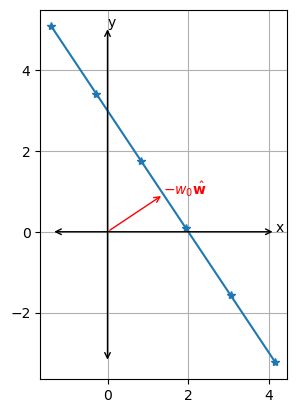

In [18]:
# Plot a line ax + by + c = 0
scale = 10
# a, b, c = [scale*(random.random()-0.5) for _ in range(3)] # random number from -10 to 10
# abc = scale*(np.random.rand(3)-0.5)  # random number from -10 to 10
abc = [3, 2, -6] # pick your favorite line
w = abc[:2]
hatw = w / np.linalg.norm(w) # What does np.linalg.norm do?
w0 = abc[2] / np.linalg.norm(w)

# Generate some sample points on a line
x = points_on_line(hatw, w0, Npts=6, scale=scale) # Npts x 2 array

# Plot the points
fig, ax = plt.subplots()
stylizeax(ax, (x[:, 0].min(), x[:, 0].max(), x[:, 1].min(), x[:, 1].max())) # numpy allows for multi-dimensional slicing
ax.plot(x[:, 0], x[:, 1], '*-') # the line
pt0 = -w0*hatw
ax.annotate("", xytext=(0, 0), xy=(pt0[0], pt0[1]),
            arrowprops=dict(arrowstyle="->", color='r'))
ax.text(pt0[0], pt0[1], r"$-w_0\hat{\mathbf{w}}$", color='r')


# Linear regression: review

Let's take the simple linear regression example from STS332 textbook (uploaded on brightspace;page 300; Table 6-1). 

"As an illustration, consider the data in Table 6-1. In this table, y is the salt concentration
(milligrams/liter) found in surface streams in a particular watershed and x is the percentage of
the watershed area consisting of paved roads."

In [19]:
%%writefile saltconcentration.tsv
#Observation	SaltConcentration	RoadwayArea
1	3.8	0.19
2	5.9	0.15
3	14.1	0.57
4	10.4	0.4
5	14.6	0.7
6	14.5	0.67
7	15.1	0.63
8	11.9	0.47
9	15.5	0.75
10	9.3	0.6
11	15.6	0.78
12	20.8	0.81
13	14.6	0.78
14	16.6	0.69
15	25.6	1.3
16	20.9	1.05
17	29.9	1.52
18	19.6	1.06
19	31.3	1.74
20	32.7	1.62

Writing saltconcentration.tsv


In [20]:
# numpy can import text files separated by seprator like tab or comma
salt_concentration_data = np.loadtxt("saltconcentration.tsv")
salt_concentration_data

array([[ 1.  ,  3.8 ,  0.19],
       [ 2.  ,  5.9 ,  0.15],
       [ 3.  , 14.1 ,  0.57],
       [ 4.  , 10.4 ,  0.4 ],
       [ 5.  , 14.6 ,  0.7 ],
       [ 6.  , 14.5 ,  0.67],
       [ 7.  , 15.1 ,  0.63],
       [ 8.  , 11.9 ,  0.47],
       [ 9.  , 15.5 ,  0.75],
       [10.  ,  9.3 ,  0.6 ],
       [11.  , 15.6 ,  0.78],
       [12.  , 20.8 ,  0.81],
       [13.  , 14.6 ,  0.78],
       [14.  , 16.6 ,  0.69],
       [15.  , 25.6 ,  1.3 ],
       [16.  , 20.9 ,  1.05],
       [17.  , 29.9 ,  1.52],
       [18.  , 19.6 ,  1.06],
       [19.  , 31.3 ,  1.74],
       [20.  , 32.7 ,  1.62]])

Text(0, 0.5, 'Salt concentration (mg/L)')

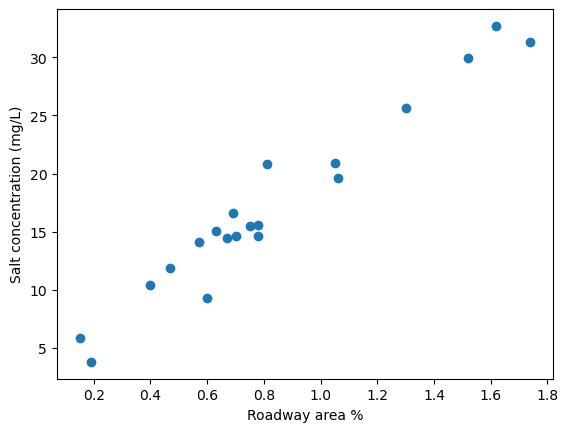

In [21]:
# Plot the points
fig, ax = plt.subplots()
# Scatter plot using matplotlib
ax.scatter(salt_concentration_data[:, 2], salt_concentration_data[:, 1])
ax.set_xlabel(r"Roadway area %")
ax.set_ylabel(r"Salt concentration (mg/L)")

## Least squares regression


![](imgs/least-sq-stubs.png)

The problem of linear regression is to find a line that "best fits" the given data. That is we want all the points $\{(x_1, y_1), \dots, (x_n, y_n)\}$ to satisfy the equation of the line $y = mx + c$.  Since we know that there exists no such line, so we will try to make $y \approxeq mx + c$, by minimizing some error/distance/cost/loss function between $y$ and $mx + c$ for every point $(x_i, y_i)$ in the dataset. The simplest error function that results in nice answers is squared distance:

$$e(x_i,y_i) = (y_i - (mx_i + c))^2$$

Then we can minimize the total error to find the line:

$$m^*, c^* = \arg~\min_{m, c} \sum_{i=1}^n e(x_i,y_i)$$


Geometrically, this error minimization corresponds to minimizing the stubs in the following figure:

## Vectorization of Least square regression

$\newcommand{\bfe}{\mathbf{e}}$
$\newcommand{\bfm}{\mathbf{m}}$
Recall that the magnitude of a vector $ \|\bfv\| = \sqrt{v_1^2 + v_2^2 + \dots + v_n^n}$ has a similar form to the error function. This suggests that we can define an error vector with the signed error for each data point as it's elements

$$ \bfe = \begin{bmatrix}y_1 - (mx_1 + c)\\ y_2 - (mx_2 + c)\\ \vdots \\ y_n - (mx_n + c)\end{bmatrix}$$

Minimizing the total error is same as minimizing the square of error vector magnitude 

$$m^*, c^* = \arg~\min_{m, c} \|\bfe\|^2$$

While we are at at it let us define $\bfx = [x_1; \dots; x_n]$ to denote the vector of all x coordinates of the dataset and $\bfy = [y_1; \dots; y_n]$ to denote y coordinates. Then the error vector is:
$$ \bfe = \bfy - (\bfx m +  \mathbf{1}_n c)$$ 

where $\mathbf{1}_n$ is a n-D vector of all ones. Finally, we vectorize parameters of the line $\bfm = [m; c]$. We will also need to horizontally concatenate $\bfx$ and $\mathbf{1}_n$. Let's call the result $\bfX = [\bfx, \mathbf{1}_n] \in \bbR^{n \times 2}$. Now, the error vector looks like this:

$$ \bfe = \bfy - \bfX \bfm$$ 

Expanding the error magnitude:

$$ \|\bfe\|^2 = (\bfy - \bfX \bfm)^\top (\bfy - \bfX \bfm)
\\
= \bfy^\top\bfy + \bfm^\top \bfX^\top \bfX \bfm - 2\bfy^\top \bfX \bfm 
$$

Our minimization problem in vectorized form is:

$$\bfm^* = \arg~\min_{\bfm} \bfy^\top\bfy + \bfm^\top \bfX^\top \bfX \bfm - 2\bfy^\top \bfX \bfm $$

This is a quadratic equation in $\bfm$ that can be minimized by equating the derivate to zero.

### Two rules of vector derivatives

There are two conventions in vector derivatives:
1. Gradient convention
2. Jacobian convention

#### Gradient convention

Under gradient convention the derivative of scalar-valued vector function function $f(\bfx): \bbR^n \to \bbR$ is
defined as vertical stacking of element-wise derivatives

$$
\newcommand{\p}{\partial}
\frac{\p }{ \p \bfx} f(\bfx) = 
\begin{bmatrix}\frac{\p f(\bfx)}{\p x_1} \\ \vdots \\ \frac{\p f(\bfx)}{\p x_n}\end{bmatrix} \in \bbR^n
$$

#### Jacobian convention

Under gradient convention the derivative of scalar-valued vector function function $f(\bfx):  \bbR^n \to \bbR$ is
defined as horizontal stacking of element-wise derivatives

$$
\newcommand{\bff}{\mathbf{f}}
\frac{\p }{ \p \bfx} f(\bfx) = 
\begin{bmatrix}\frac{\p f(\bfx)}{\p x_1} & \dots & \frac{\p f(\bfx)}{\p x_n}\end{bmatrix} \in \bbR^{1 \times n}$$

For a vector-value vector function $\bff(\bfx): \bbR^n \to \bbR^m$, Jacobian of $\bff(\bfx)$ is the vertical concatentation of gradients transposed, resulting in $m \times n$ matrix
$$\newcommand{\bfJ}{\mathbf{J}}
\bfJ_\bfx (\bff(\bfx)) = \frac{\p }{ \p \bfx} \bff(\bfx) = 
\begin{bmatrix}\frac{\p f_1(\bfx)}{\p \bfx} \\ \dots \\ \frac{\p f_m(\bfx)}{\p \bfx}\end{bmatrix}
$$

We will use Jacobian convention in this course, because it works nicely with chain rule.

#### Derivative of a linear function

All scalar-valued linear functions of $\bfx$ can be written in the form $f(\bfx) = \bfc^\top \bfx$.

\begin{align}
\newcommand{\bfc}{\mathbf{c}}
\newcommand{\bfA}{\mathbf{A}}
\frac{\p }{ \p \bfx} \bfc^\top \bfx = \bfc^\top\\
\end{align}

#### Derivative of a quadratic function

All scalar-valued homogeneous quadratic functions of $\bfx$ can be written in the form $f(\bfx) = \bfx^\top \bfA \bfx$.

\begin{align}
\frac{\p }{ \p \bfx} \bfx^\top \bfA \bfx = \bfx^\top (\bfA + \bfA^\top)
\end{align}

### Back to Least square regression

\begin{align}
\mathbf{0}^\top &= \frac{\p }{\p \bfm} ( \bfy^\top\bfy + \bfm^\top \bfX^\top \bfX \bfm - 2\bfy^\top \bfX \bfm)\\
      &= 2 {\bfm^*}^\top \bfX^\top \bfX  - 2\bfy^\top \bfX
\end{align}

This gives us the solution
$$ \bfm^* = (\bfX^\top \bfX)^{-1} \bfX^\top \bfy $$

The symbol $\bfV^{-1}$ is called inverse of matrix $\bfV$.

The term $(\bfX^\top \bfX)^{-1} \bfX^\top$ is also called the pseudo-inverse of a matrix $\bfX$, denoted as $\bfX^\dagger$.

In [46]:
n = salt_concentration_data.shape[0]
bfx = salt_concentration_data[:, 2:3]
bfy = salt_concentration_data[:, 1:2]
bfX = np.hstack((bfx, np.ones((bfx.shape[0], 1))))
bfX

array([[0.19, 1.  ],
       [0.15, 1.  ],
       [0.57, 1.  ],
       [0.4 , 1.  ],
       [0.7 , 1.  ],
       [0.67, 1.  ],
       [0.63, 1.  ],
       [0.47, 1.  ],
       [0.75, 1.  ],
       [0.6 , 1.  ],
       [0.78, 1.  ],
       [0.81, 1.  ],
       [0.78, 1.  ],
       [0.69, 1.  ],
       [1.3 , 1.  ],
       [1.05, 1.  ],
       [1.52, 1.  ],
       [1.06, 1.  ],
       [1.74, 1.  ],
       [1.62, 1.  ]])

In [47]:
bfm = np.linalg.inv(bfX.T @ bfX) @ bfX.T @ bfy
print(bfm)
bfm, *_ = np.linalg.lstsq(bfX, bfy, rcond=None)
print(bfm)

[[17.5466671 ]
 [ 2.67654631]]
[[17.5466671 ]
 [ 2.67654631]]


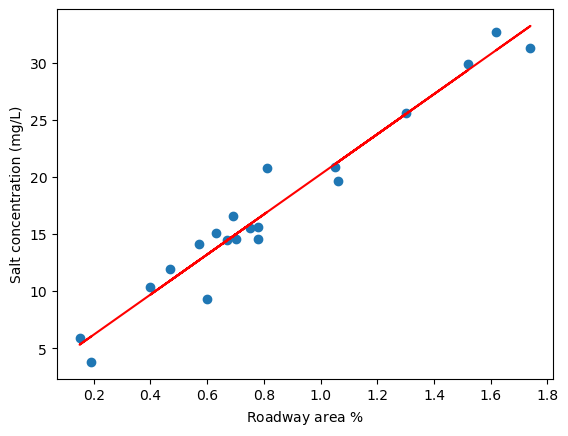

In [48]:
m = bfm.flatten()[0]
c = bfm.flatten()[1]

# Plot the points
fig, ax = plt.subplots()
ax.scatter(salt_concentration_data[:, 2], salt_concentration_data[:, 1])
ax.set_xlabel(r"Roadway area $\%$")
ax.set_ylabel(r"Salt concentration (mg/L)")
x = salt_concentration_data[:, 2]
y = m * x + c
# Plot the points
ax.plot(x, y, 'r-') # the line

## Exercise 1

Derive the equations for least square linear regression when the equation of line is $\hat{\bfw}^\top \bfx + w_0 = 0$ instead of $y = mx + c$.

Hint: Convert the least square problem into equation of the form $\bfv^* = \arg~\min_{\bfv}\|\mathbf{L}\bfv\|^2$ such that $\bfv^\top \bfv = 1$. Solve by finding null space of $\mathbf{L}$. $\bfv$ lies in the nullspace of $\mathbf{L}$. The nullspace of $\mathbf{L}$ is the last eigenvector (corresponding to the smallest eigenvalue) of $\mathbf{L}^\top\mathbf{L}$.

The error $e(x_i, y_i) = (y - (mx + c))^2$ can be visualized as distance of observed point from the fit line parallel to y-axis. Draw the visual for the errors of the form:  $e(\bfx_i) = (\hat{\bfw}^\top \bfx_i + w_0 - 0)^2$. You do not need to use matplotlib. You can draw by hand or editing software.